In [4]:
from Halite import *
from paleopy import *

### Versione mia precedente, prob sbagliata

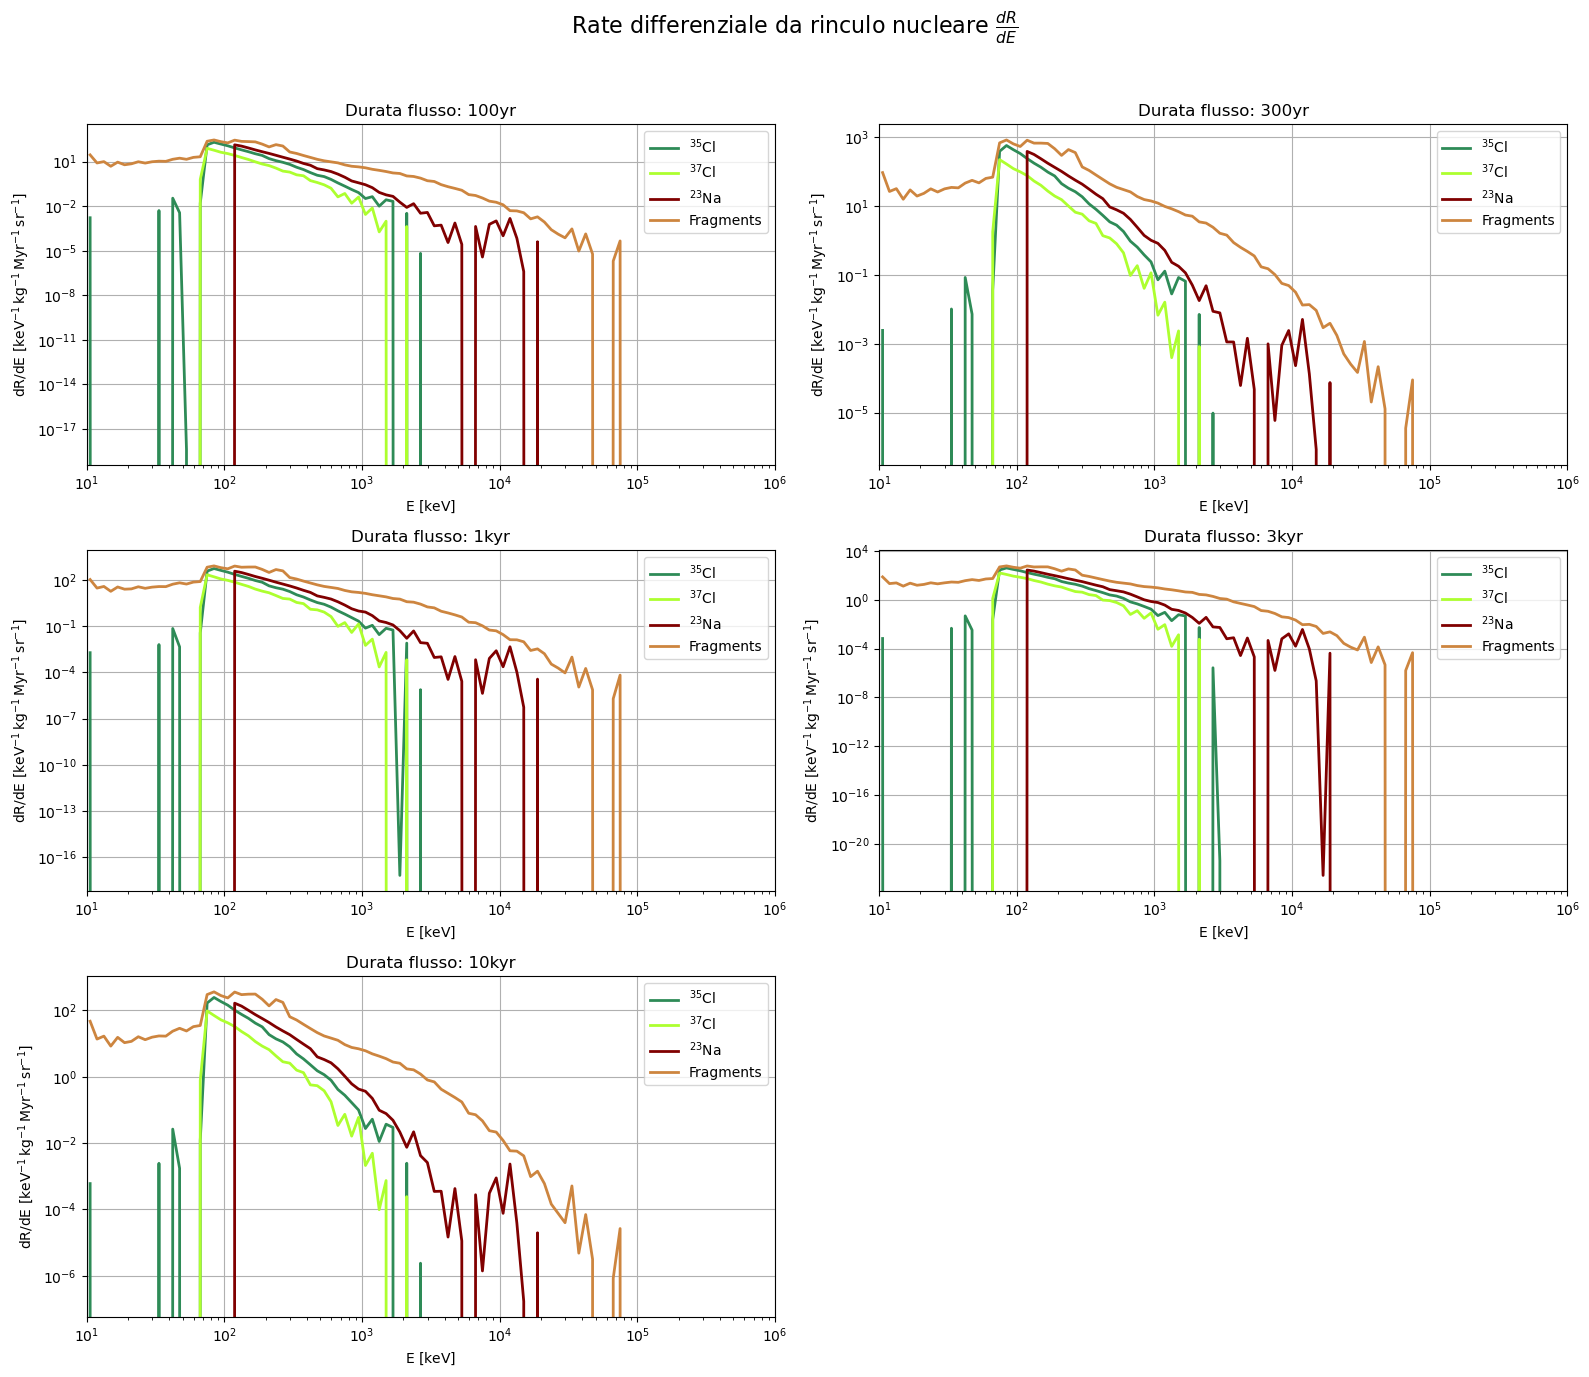

In [2]:
# Parametri iniziali
Er = np.logspace(-2, 3, 101)  # Energia in MeV
time_exposure = 13500 * 365 * 24 * 60 * 60  # Tempo di esposizione in secondi 
label_time_fluxes = ["100yr", "300yr", "1kyr", "3kyr", "10kyr"]  # Nome dei file .dat del tempo di durata dei flussi 
time_fluxes = [1.5e-4, 4.5e-4, 1.35e-3, 3.5e-3, 1.35e-2]  # Intervallo tra un flusso e l'altro in Myr

# Crea la figura e i subplot 3x2
fig, axs = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle("Rate differenziale da rinculo nucleare $\\frac{{dR}}{{dE}}$", fontsize=16)

for i, label in enumerate(label_time_fluxes):
    # Carica il flusso iniziale
    x, y = np.loadtxt(f"MuonFluxes/SN20pc{label}.txt", usecols=(0, 1), unpack=True)
    # Crea un array di flussi interpolati
    y = y[:-1] / np.diff(x)
    x = x[:-1]
    flux_func = log_interp1d(x, y)  # Energia in GeV e flusso m-2*s-1*sr-1*GeV-1

    # Integra e calcola conteggi
    Num = Integration([flux_func], [time_fluxes[i]], time_exposure)  # Array somma delle energie di tutti i flussi, normalizzato al tempo totale
    Conta = Count(Num, Er)

    Er_width = np.diff(Er)  # Larghezza del bin
    Er_mid = Er[:-1] + Er_width / 2  # Punto medio del bin

    Frag = np.zeros(len(Er_mid))  # Array con tutti i punti medi dei bin di energia
    for k in range(len(Conta[4])):  # Conta[4]=lunghezza di nuclei
        for l in range(len(Er_mid)):
            Frag[l] += Conta[3][k][l]  # Somma i bin dei vari nuclei

    F35 = interp1d(Er_mid, Conta[0] / Er_width, fill_value='extrapolate')  # Interpolazione
    F37 = interp1d(Er_mid, Conta[1] / Er_width, fill_value='extrapolate')
    F23 = interp1d(Er_mid, Conta[2] / Er_width, fill_value='extrapolate')

    # Seleziona il subplot corrente
    ax = axs[i // 2, i % 2]
    axs[2,1].set_visible(False) #nascondo il subplor che non mi serve

    # Disegna nel subplot corrente
    ax.loglog(Er_mid * 1e3, F35(Er_mid) * 1e-3 / (length * rho), label="$^{35}$Cl", linewidth=2, color='seagreen')
    ax.loglog(Er_mid * 1e3, F37(Er_mid) * 1e-3 / (length * rho), label="$^{37}$Cl", linewidth=2, color='greenyellow')
    ax.loglog(Er_mid * 1e3, F23(Er_mid) * 1e-3 / (length * rho), label="$^{23}$Na", linewidth=2, color='maroon')
    ax.loglog(Er_mid * 1e3, Frag * 1e-3 / Er_width / (length * rho), label='Fragments', linewidth=2, color='peru')

    ax.set_xlabel("E [$\\mathrm{keV}$]")
    ax.set_ylabel("dR/dE [$\\mathrm{keV}^{-1}\\,\\mathrm{kg}^{-1}\\,\\mathrm{Myr}^{-1}\\,\\mathrm{sr}^{-1}$]")
    ax.set_xlim(1e1, 1e6)
    ax.legend()
    ax.grid(True)
    ax.set_title(f"Durata flusso: {label}")

# Aggiusta gli spazi tra i subplot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Lascia spazio per il titolo generale
plt.show()


### Versione con 8 subplot, ma mia visualizzazione

/home/fefe/Thesis/all_you_need/geant/Halite.py:42: RuntimeWarning: divide by zero encountered in log10
  logy = np.log10(yy)
/home/fefe/Thesis/all_you_need/geant/Halite.py:42: RuntimeWarning: divide by zero encountered in log10
  logy = np.log10(yy)
/home/fefe/Thesis/all_you_need/geant/Halite.py:42: RuntimeWarning: divide by zero encountered in log10
  logy = np.log10(yy)


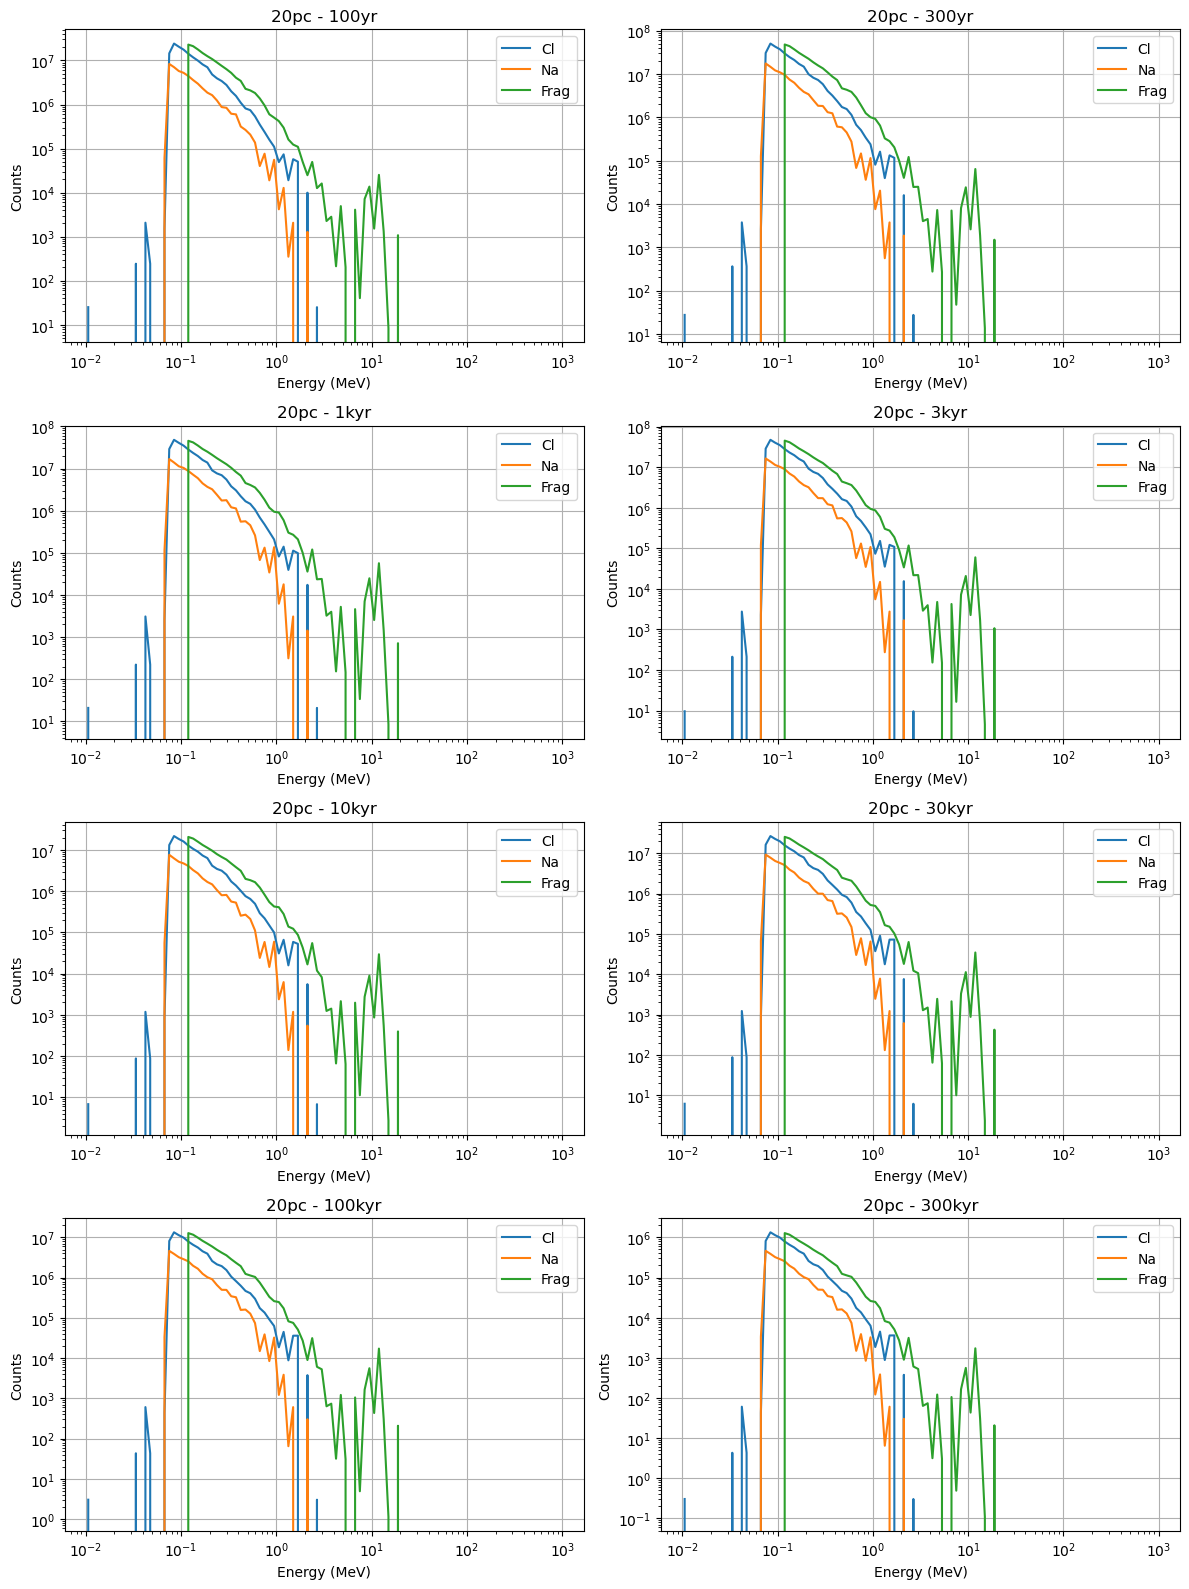

In [13]:
name = ['100yr', '300yr', '1kyr', '3kyr', '10kyr', '30kyr', '100kyr', '300kyr']
arr_time = [200*1e-6, (650-200)*1e-6, (2000-650)*1e-6, (6500-2000)*1e-6, (0.02-0.0065), (0.065-0.02), (0.2-0.065), (0.27-0.2)]

listfunc = []
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # 4 righe, 2 colonne
axes = axes.flatten()  # Rende l'array bidimensionale unidimensionale per un accesso più semplice

for i, n in enumerate(name):
    x, y = np.loadtxt('MuonFluxes/SN20pc' + n + '.txt', usecols=(0, 1), unpack=True)
    y = y[:-1] / np.diff(x)
    x = x[:-1]
    listfunc.append(log_interp1d(x, 1e-4 * y))
    
    Num = Integration([listfunc[i]], [arr_time[i]], 1.)
    weight = Num / 1e4
    n_bins = 101
    Er = np.logspace(-2, 3, n_bins)
    length = 1000  # cm
    rho = 2.16 * 1e-3  # kg/cm^3
    Er_width = np.diff(Er)
    Er_mid = Er[:-1] + Er_width / 2
    
    Conta = Count(weight, Er)
    
    ax = axes[i]  # Seleziona il subplot corrente
    ax.plot(Er_mid, Conta[0], label='Cl')
    ax.plot(Er_mid, Conta[1], label='Na')
    ax.plot(Er_mid, Conta[2], label='Frag')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f'20pc - {name[i]}')
    ax.set_xlabel('Energy (MeV)')
    ax.set_ylabel('Counts')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


### Versione con anche la funzione PlotCount di Halite

/home/fefe/Thesis/all_you_need/geant/Halite.py:42: RuntimeWarning: divide by zero encountered in log10
  logy = np.log10(yy)
/home/fefe/Thesis/all_you_need/geant/Halite.py:42: RuntimeWarning: divide by zero encountered in log10
  logy = np.log10(yy)
/home/fefe/Thesis/all_you_need/geant/Halite.py:42: RuntimeWarning: divide by zero encountered in log10
  logy = np.log10(yy)


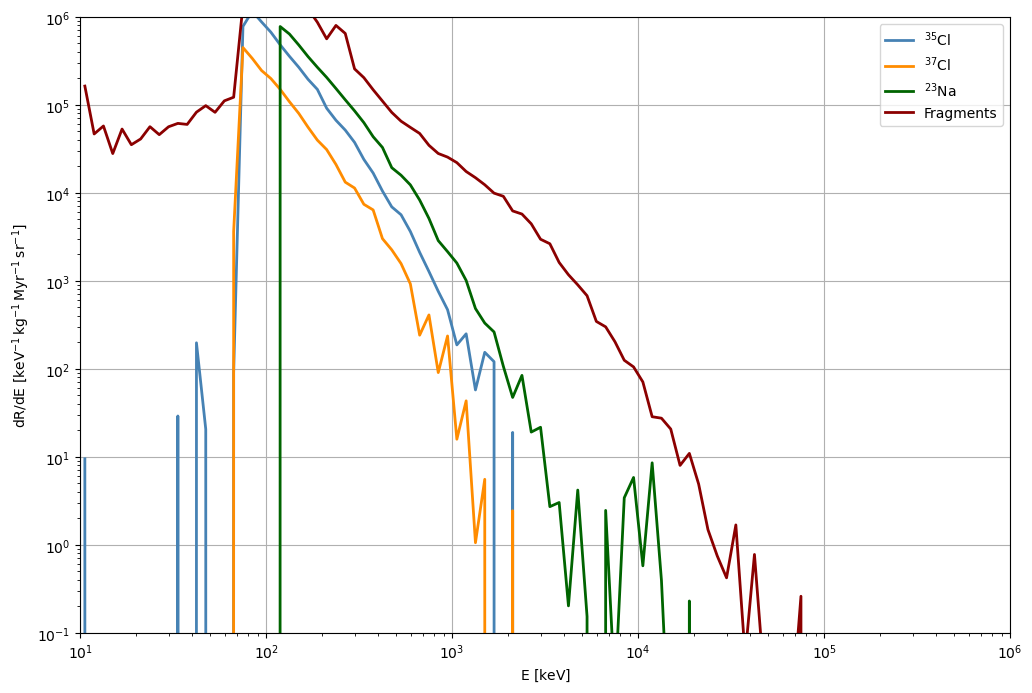

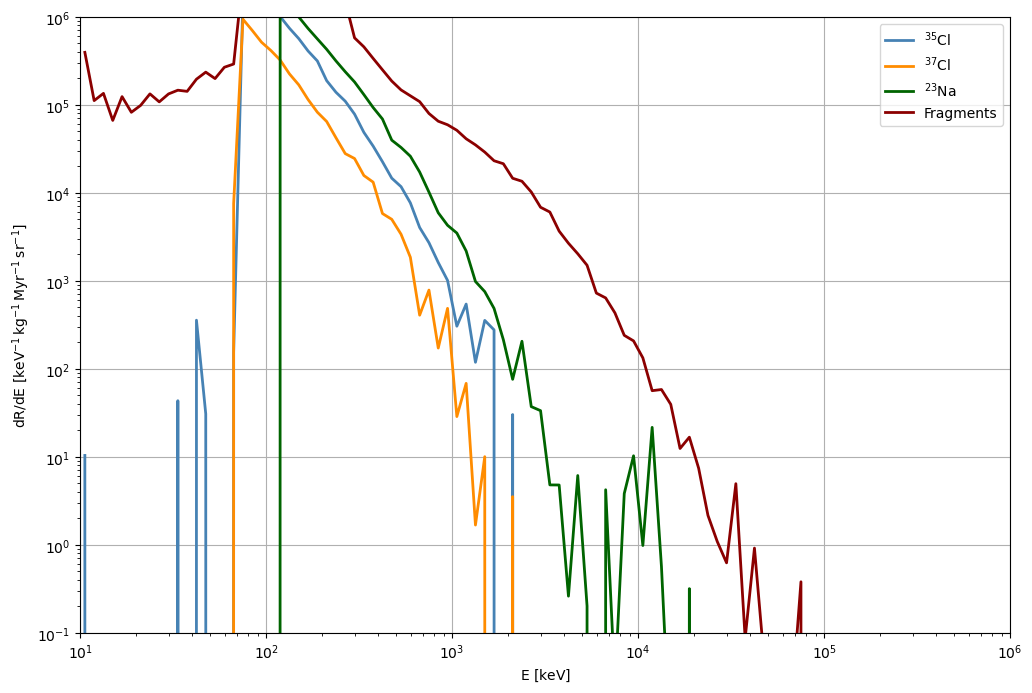

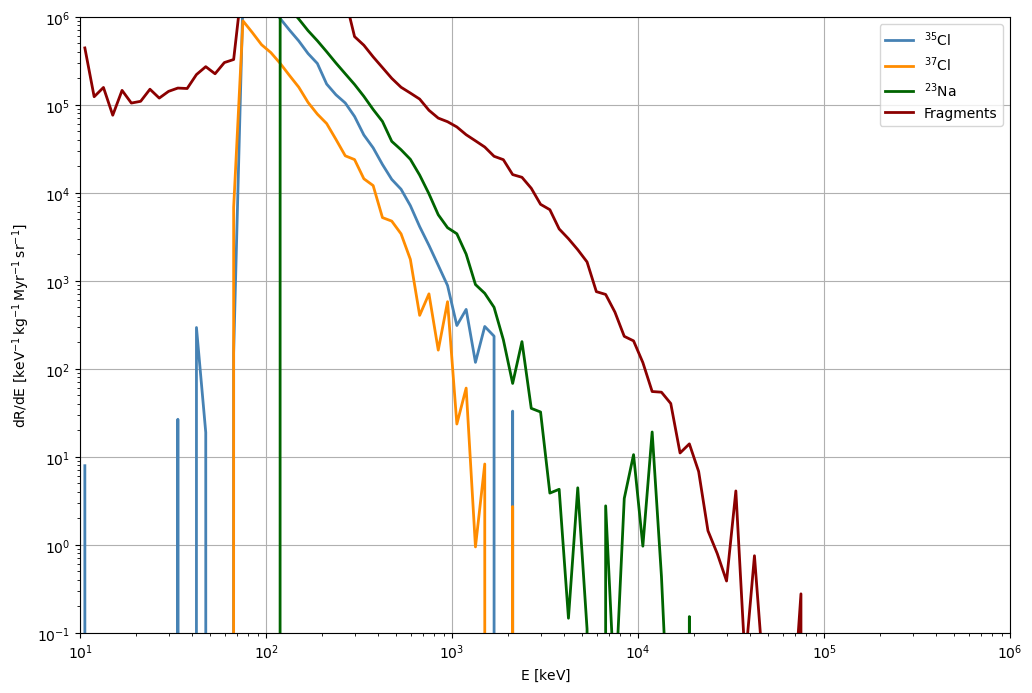

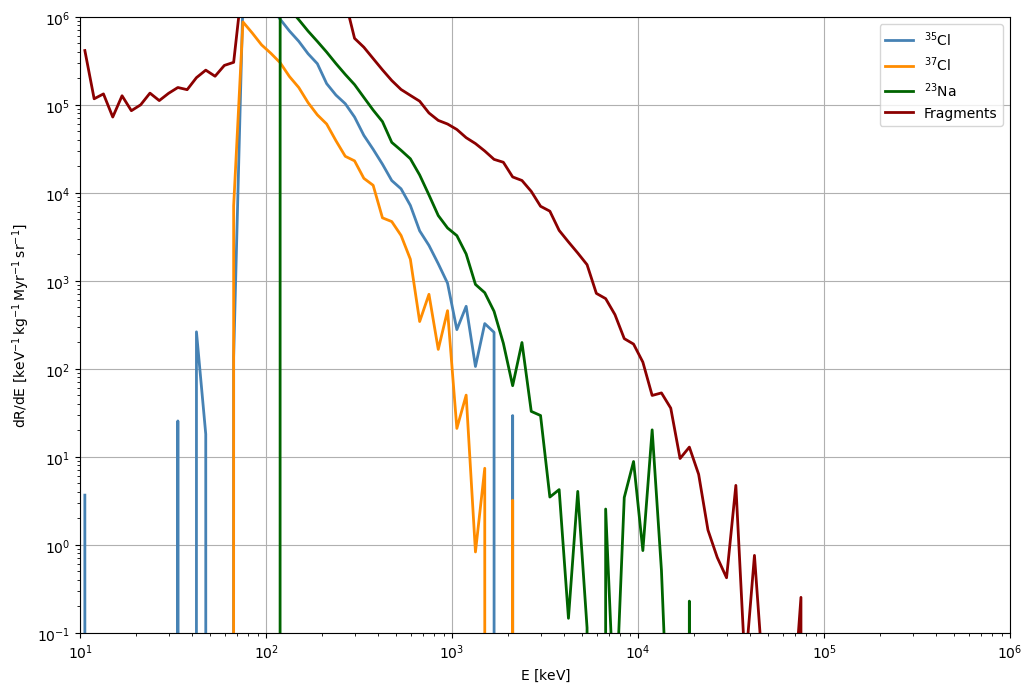

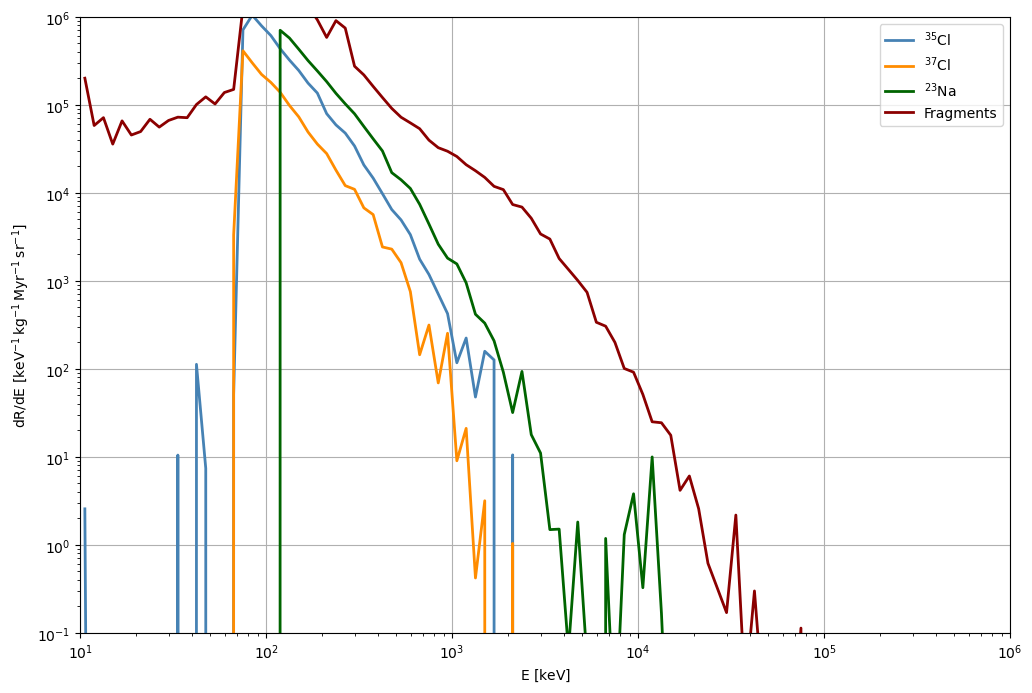

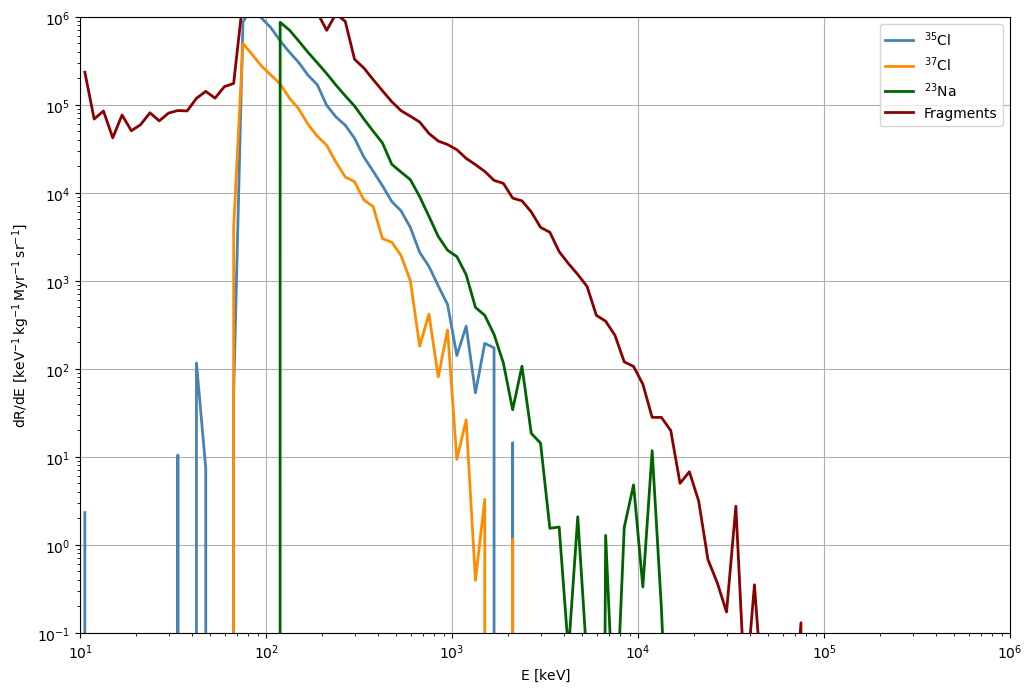

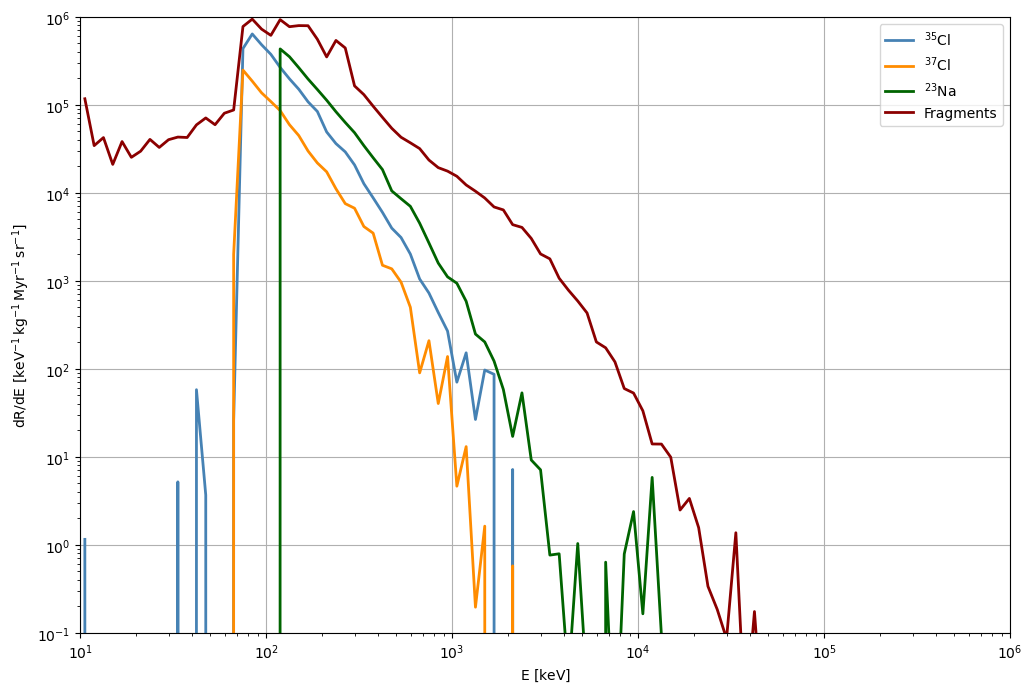

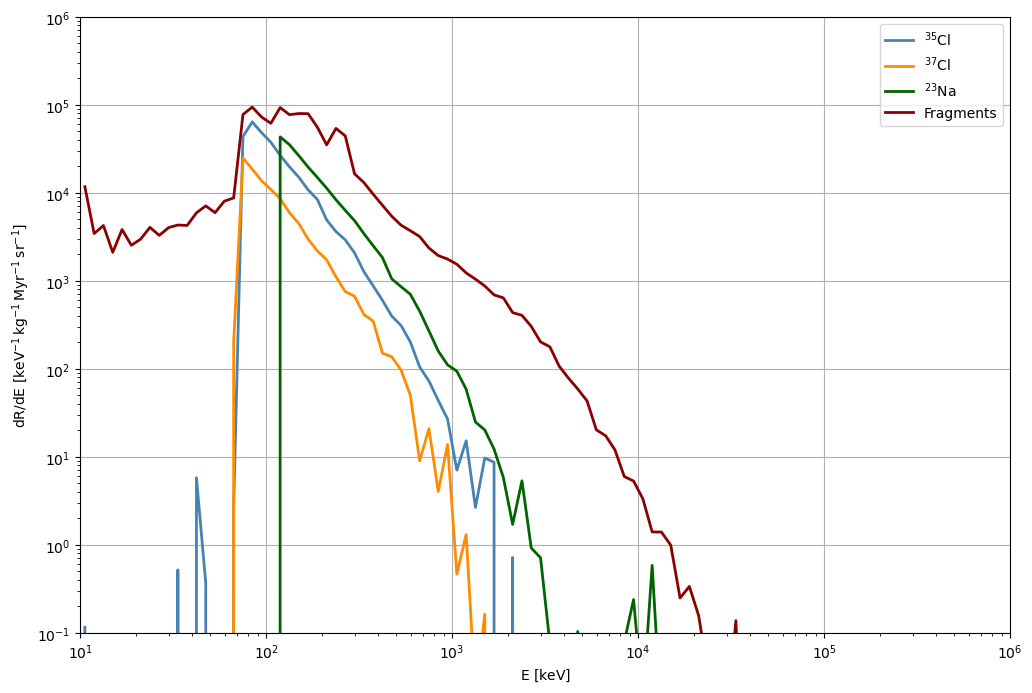

In [7]:
name = ['100yr', '300yr', '1kyr', '3kyr', '10kyr', '30kyr', '100kyr', '300kyr'] #intestazioni
arr_time = [200*1e-6, (650-200)*1e-6, (2000-650)*1e-6, (6500-2000)*1e-6, (0.02-0.0065), (0.065-0.02), (0.2-0.065), (0.27-0.2)] #ho aggiunto le parentesi all'ultimo elemento

listfunc = []
for i,n in enumerate(name):
    x,y = np.loadtxt('MuonFluxes/SN20pc'+n+'.txt', usecols = (0,1), unpack = 'true')
    y = y[:-1]/np.diff(x)
    x = x[:-1]
    listfunc.append(log_interp1d(x,1e-4*y)) #1e-4 è perchè i dati vengono dati in flusso moltiplicato per questo fattore per visualizzarli?


    Num = Integration([listfunc[i]], [arr_time[i]], 1.) #tempo totale 1 Myr, e poi non divido per il mio
    weight = Num/1e4 #divido per il tempo totale di esposizione (in Myr)
    n = 101 #bin in cui divido l'energia
    Er = np.logspace(-2, 3, n) #MeV da 10^-2 a 10^3 MeV in 101 bins
    length = 1000 #cm 
    rho = 2.16*1e-3 #kg/cm^3
    Er_width = np.diff(Er) #differenzio l'energia
    Er_mid = Er[:-1] + Er_width/2 #calcolo i centri dei bin di energia

    Conta = Count(weight, Er) #restituisce gli array dei vari nuclei con i rispettivi conteggi, 0,1 Cl; 2 Na; 3 Frag; 4 nomi dei nuclei
    PlotCount(Er, Conta, '20pc', name[i])
    Stampa('20pc',name[i], Conta, Er)


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

### Versione con dR/dE di 10^14 boh

/home/fefe/Thesis/all_you_need/geant/Halite.py:42: RuntimeWarning: divide by zero encountered in log10
  logy = np.log10(yy)
/home/fefe/Thesis/all_you_need/geant/Halite.py:42: RuntimeWarning: divide by zero encountered in log10
  logy = np.log10(yy)
/home/fefe/Thesis/all_you_need/geant/Halite.py:42: RuntimeWarning: divide by zero encountered in log10
  logy = np.log10(yy)


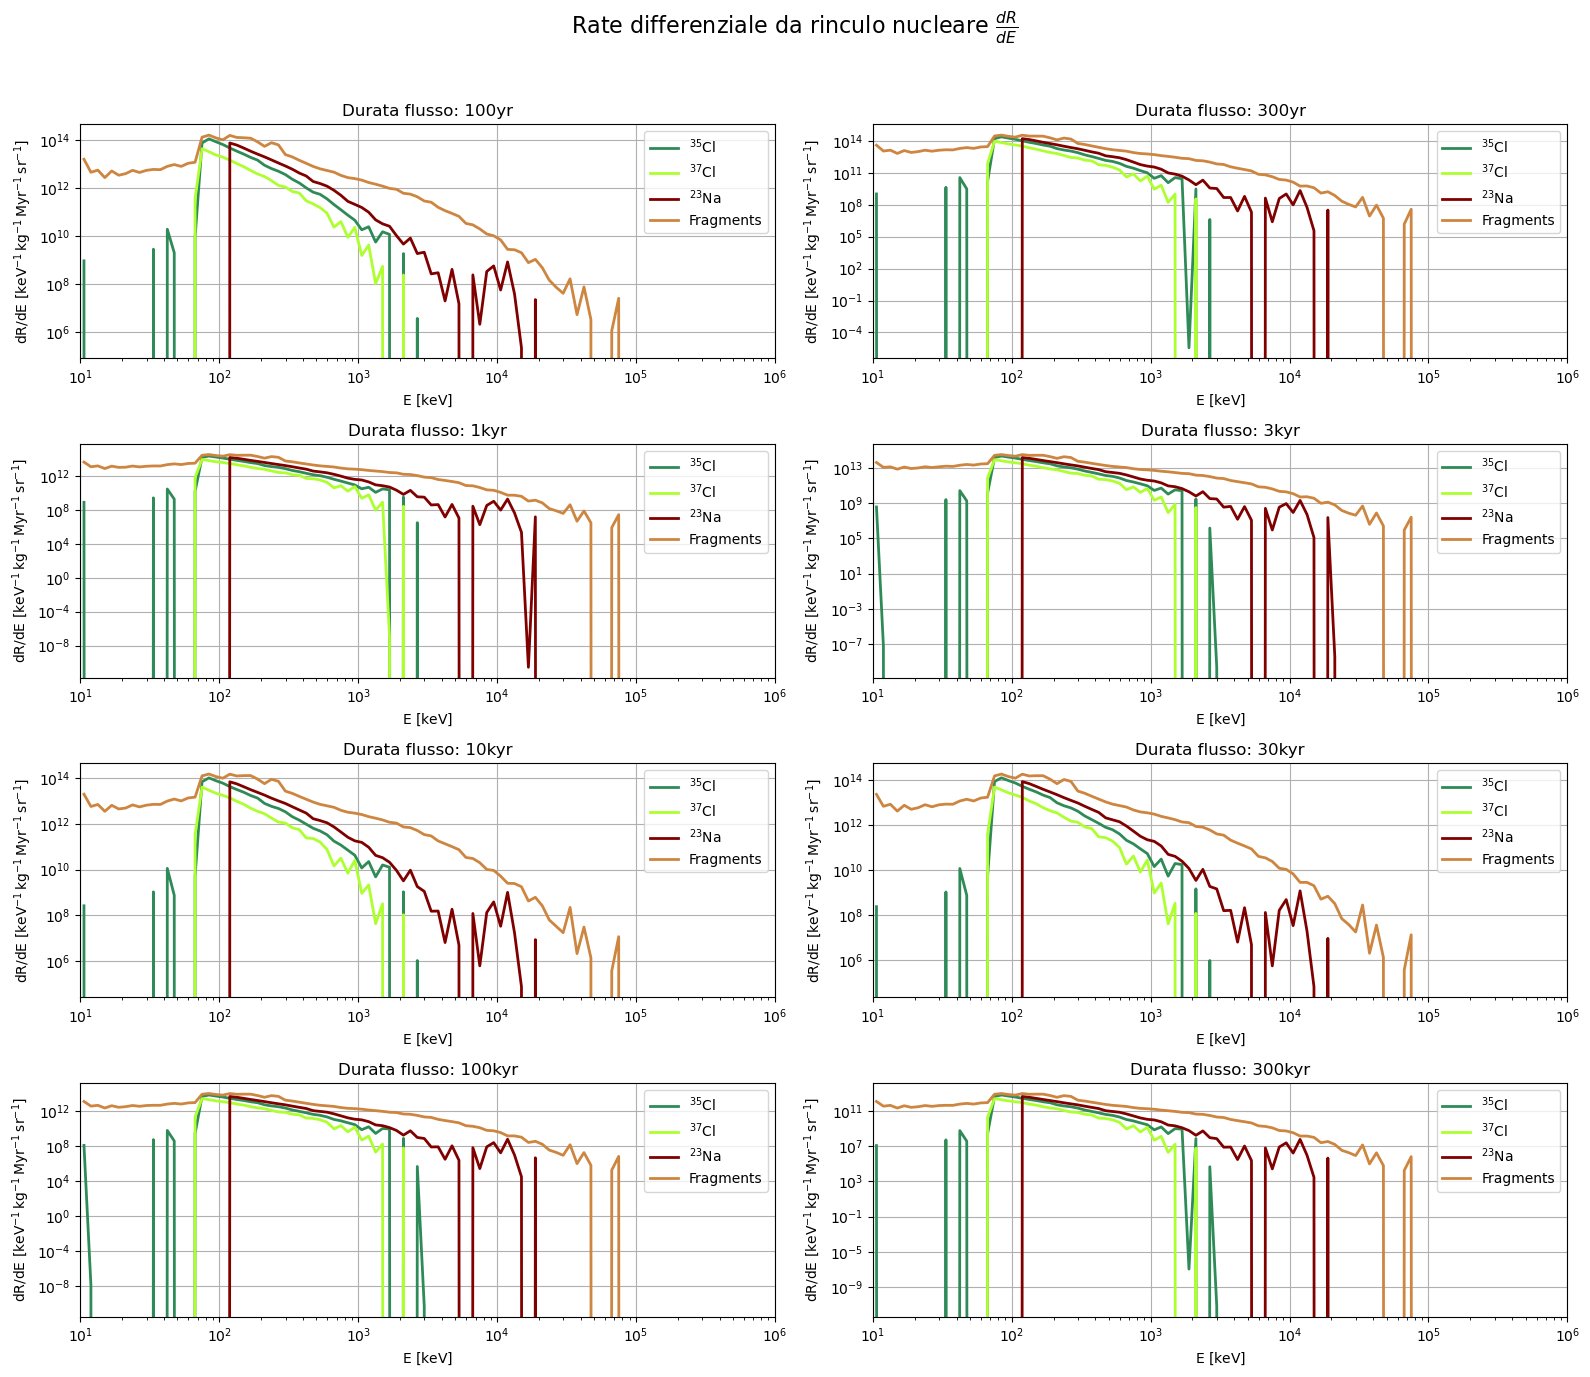

In [10]:
fig, axs = plt.subplots(4, 2, figsize=(16, 14))
fig.suptitle("Rate differenziale da rinculo nucleare $\\frac{{dR}}{{dE}}$", fontsize=16)

for i, n in enumerate(name):
    # Carica il flusso iniziale
    x, y = np.loadtxt(f"MuonFluxes/SN20pc{n}.txt", usecols=(0, 1), unpack=True)
    # Crea un array di flussi interpolati
    y = y[:-1] / np.diff(x)
    x = x[:-1]
    flux_func = log_interp1d(x, y)  # Energia in GeV e flusso m-2*s-1*sr-1*GeV-1

    # Integra e calcola conteggi
    Num = Integration([flux_func], [arr_time[i]], 1.)  # Array somma delle energie di tutti i flussi, normalizzato al tempo totale
    Conta = Count(Num, Er)

    Er_width = np.diff(Er)  # Larghezza del bin
    Er_mid = Er[:-1] + Er_width / 2  # Punto medio del bin

    Frag = np.zeros(len(Er_mid))  # Array con tutti i punti medi dei bin di energia
    for k in range(len(Conta[4])):  # Conta[4]=lunghezza di nuclei
        for l in range(len(Er_mid)):
            Frag[l] += Conta[3][k][l]  # Somma i bin dei vari nuclei

    F35 = interp1d(Er_mid, Conta[0] / Er_width, fill_value='extrapolate')  # Interpolazione
    F37 = interp1d(Er_mid, Conta[1] / Er_width, fill_value='extrapolate')
    F23 = interp1d(Er_mid, Conta[2] / Er_width, fill_value='extrapolate')

    # Seleziona il subplot corrente
    if i < axs.size:
        ax = axs.flat[i]  # Scorri attraverso i subplot in ordine lineare

        # Disegna nel subplot corrente
        ax.loglog(Er_mid * 1e3, F35(Er_mid) * 1e-3 / (length * rho), label="$^{35}$Cl", linewidth=2, color='seagreen')
        ax.loglog(Er_mid * 1e3, F37(Er_mid) * 1e-3 / (length * rho), label="$^{37}$Cl", linewidth=2, color='greenyellow')
        ax.loglog(Er_mid * 1e3, F23(Er_mid) * 1e-3 / (length * rho), label="$^{23}$Na", linewidth=2, color='maroon')
        ax.loglog(Er_mid * 1e3, Frag * 1e-3 / Er_width / (length * rho), label='Fragments', linewidth=2, color='peru')

        ax.set_xlabel("E [$\\mathrm{keV}$]")
        ax.set_ylabel("dR/dE [$\\mathrm{keV}^{-1}\\,\\mathrm{kg}^{-1}\\,\\mathrm{Myr}^{-1}\\,\\mathrm{sr}^{-1}$]")
        ax.set_xlim(1e1, 1e6)
        ax.legend()
        ax.grid(True)
        ax.set_title(f"Durata flusso: {n}")

# Aggiusta gli spazi tra i subplot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Lascia spazio per il titolo generale
plt.show()


## $\frac{dR}{dx}$ sommando tutti i i-esimi nuclei, pesati, tramite la chain rule


In [7]:
import paleopy as paleopy
from paleopy import *

halite = paleopy.Mineral("Halite")

In [9]:
z_bins = np.linspace(0, 100000, 100000)
print(halite.dRdx_muons_fefe(z_bins, "100yr"))

S
Ne
O
Si
Al
P
F
N
C
Mg
Na
He
Li
Be
Cl
Ar
[0.        0.        0.        ... 0.8938301 0.8938679 0.8939057]


S
Ne
O
Si
Al
P
F
N
C
Mg
Na
He
Li
Be
Cl
Ar


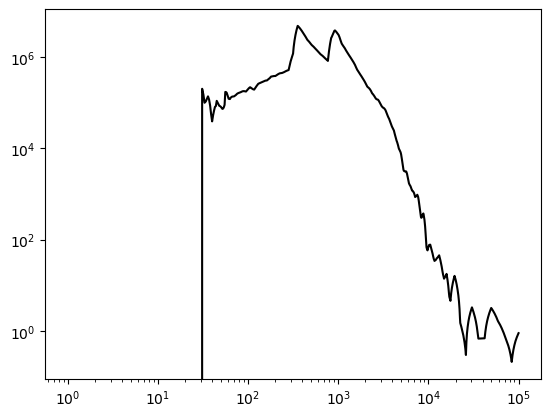

In [10]:
plt.figure()
plt.loglog(z_bins[:-1], halite.dRdx_muons_fefe(z_bins,"100yr"), color="k")
#plt.xlabel("$x/\\text{nm}$")
#plt.ylable("$\\text{d}R/\\text{d}x$")
plt.show()

S
Ne
O
Si
Al
P
F
N
C
Mg
Na
He
Li
Be
Cl
Ar
S
Ne
O
Si
Al
P
F
N
C
Mg
Na
He
Li
Be
Cl
Ar
S
Ne
O
Si
Al
P
F
N
C
Mg
Na
He
Li
Be
Cl
Ar
S
Ne
O
Si
Al
P
F
N
C
Mg
Na
He
Li
Be
Cl
Ar
S
Ne
O
Si
Al
P
F
N
C
Mg
Na
He
Li
Be
Cl
Ar
S
Ne
O
Si
Al
P
F
N
C
Mg
Na
He
Li
Be
Cl
Ar
S
Ne
O
Si
Al
P
F
N
C
Mg
Na
He
Li
Be
Cl
Ar
S
Ne
O
Si
Al
P
F
N
C
Mg
Na
He
Li
Be
Cl
Ar


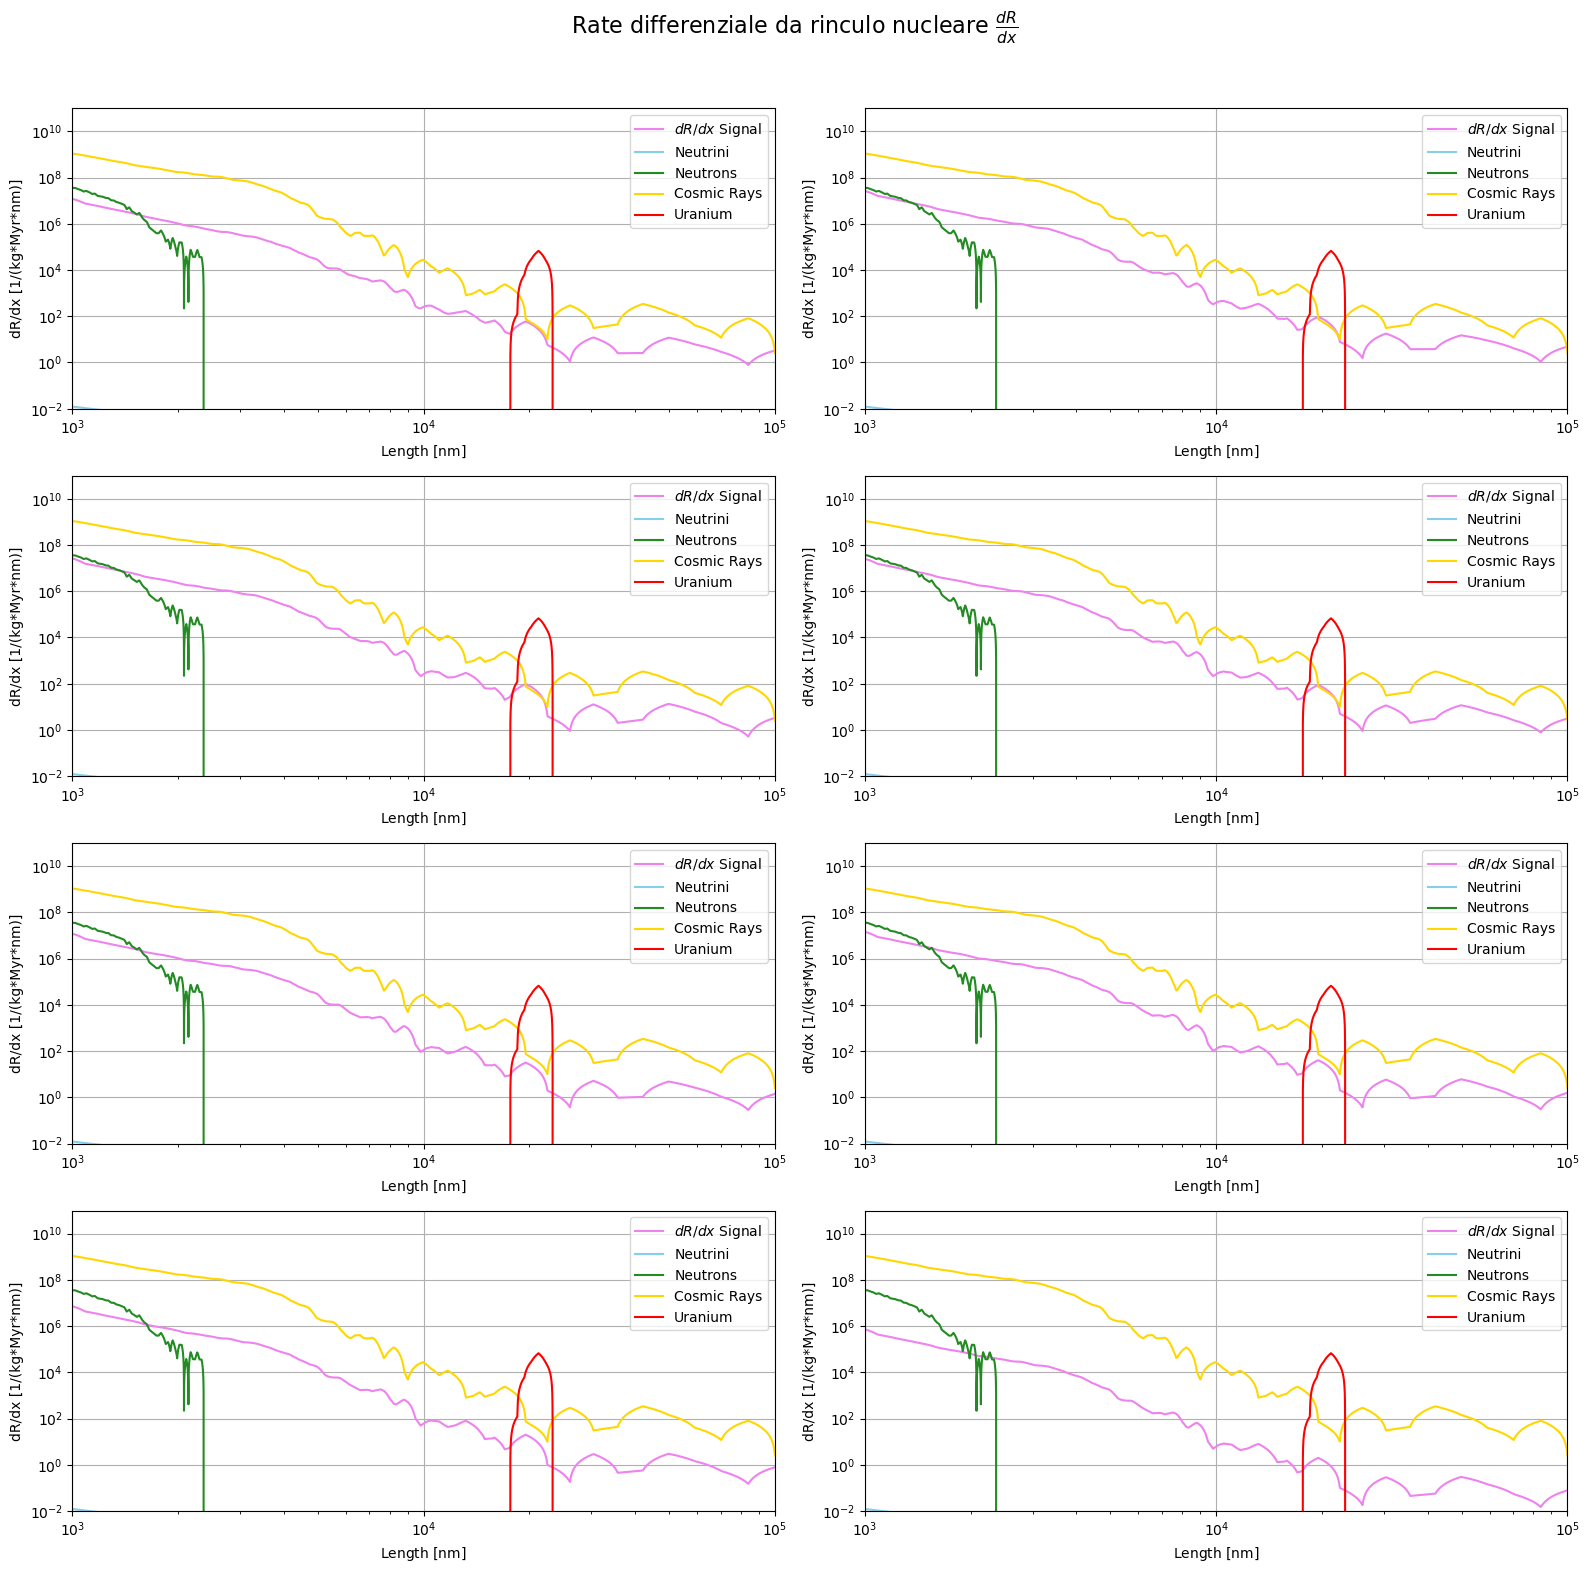

In [15]:
# Parametri iniziali
Er = np.logspace(-2, 3, 101)  # Energia in MeV
time_exposure = 270000 * 365 * 24 * 60 * 60  # Tempo di esposizione in secondi 
name = ['100yr', '300yr', '1kyr', '3kyr', '10kyr', '30kyr', '100kyr', '300kyr'] #intestazioni
arr_time = [200*1e-6, (650-200)*1e-6, (2000-650)*1e-6, (6500-2000)*1e-6, (0.02-0.0065), (0.065-0.02), (0.2-0.065), (0.27-0.2)]


# Crea la figura e i subplot 2x2
fig, axs = plt.subplots(4, 2, figsize=(16, 16))
fig.suptitle("Rate differenziale da rinculo nucleare $\\frac{{dR}}{{dx}}$", fontsize=16)

for idx, n in enumerate(name):
    
    
    # Sceglie il subplot
    ax = axs[idx // 2, idx % 2]
    #ax = axes.flatten()  # Rende l'array bidimensionale unidimensionale per un accesso più semplice

    # Aggiungo il calcolo di dR/dx (z_bins in nm)
    z_bins = np.linspace(0, 100000, 100000)
    #correzione numero di z_bins
    zz_centre = z_bins[:-1] +  np.diff(z_bins)/2.

    # dR/dE -> dR/dx con la funzione dRdx_modified(...)
    # Divido per (length*rho) se interpretato come conversione tra sezione e massa
    #y_values35 = halite.dRdx_modified(z_bins, Er_mid*1e3, F35(Er_mid)*1e-3/(length*rho))
    #y_values37 = halite.dRdx_modified(z_bins, Er_mid*1e3, F37(Er_mid)*1e-3/(length*rho))
    #y_values23 = halite.dRdx_modified(z_bins, Er_mid*1e3, F23(Er_mid)*1e-3/(length*rho))
    # Somma di tutti i frammenti
    #print(type(halite.loadMuon_fefe("20pc", n)[i]))
    #print(halite.loadMuon_fefe("20pc", n)[i])
    y_valuesSig = halite.dRdx_muons_fefe(z_bins, n)
    

    
    # Altri contributi
    y_nu        = halite.dRdx_nu(z_bins)
    y_neutrons  = halite.dRdx_neutrons(z_bins)
    y_cosmicrays = halite.dRdx_muons_new(z_bins, "Resconi")
    
    #adding Uranium tracks
    data_U = np.loadtxt("../Fission/Uranium_counts.txt", comments="#")
    i_index = data_U[:,0]   # 0..(n_bins-2)
    count_U = data_U[:,1]   # lunghezza 199

    U_x_min = 1
    U_x_max = 5
    U_n_bins = 200
    U_length = np.logspace(U_x_min, U_x_max, U_n_bins) 
    length_centers = 0.5*(U_length[:-1] + U_length[1:])
    bin_widths = U_length[1:] - U_length[:-1]

    Na  = 6.022e23
    tau = 6.45e3
    factor = 1e-5*(5.4e-7)*((1.2e-6)*Na*1e3/(238))/tau

    
    y_U = count_U / bin_widths
    f_U = interp1d(length_centers, y_U, bounds_error=False, fill_value=0.0)
    yU_interp = f_U(zz_centre)

    # Plot
    #ax.loglog(zz_centre, y_values35, label='$dR/dx$ $^{35}$Cl', color='darkmagenta')
    #ax.loglog(zz_centre, y_values37, label='$dR/dx$ $^{37}$Cl', color='deeppink')
    #ax.loglog(zz_centre, y_values23, label='$dR/dx$ $^{23}$Na', color='mediumpurple')
    ax.loglog(zz_centre, y_valuesSig/0.27, label='$dR/dx$ Signal', color='violet')

    # Valuta tu se serve la stessa scala:
    ax.loglog(zz_centre, y_nu/0.27, label='Neutrini', color='skyblue')
    ax.loglog(zz_centre, y_neutrons/0.27, label='Neutrons', color='forestgreen')
    ax.loglog(zz_centre, y_cosmicrays/0.27, label='Cosmic Rays',color='gold') #divido per il tempo totale?
    ax.loglog(zz_centre, factor*yU_interp/0.27, label='Uranium', color='red')


    ax.set_xlabel("Length [$\\mathrm{nm}$]")
    ax.set_ylabel("dR/dx [1/(kg*Myr*nm)]")
    ax.set_xlim(1e3, 1e5)
    ax.set_ylim(1e-2, 1e11)
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


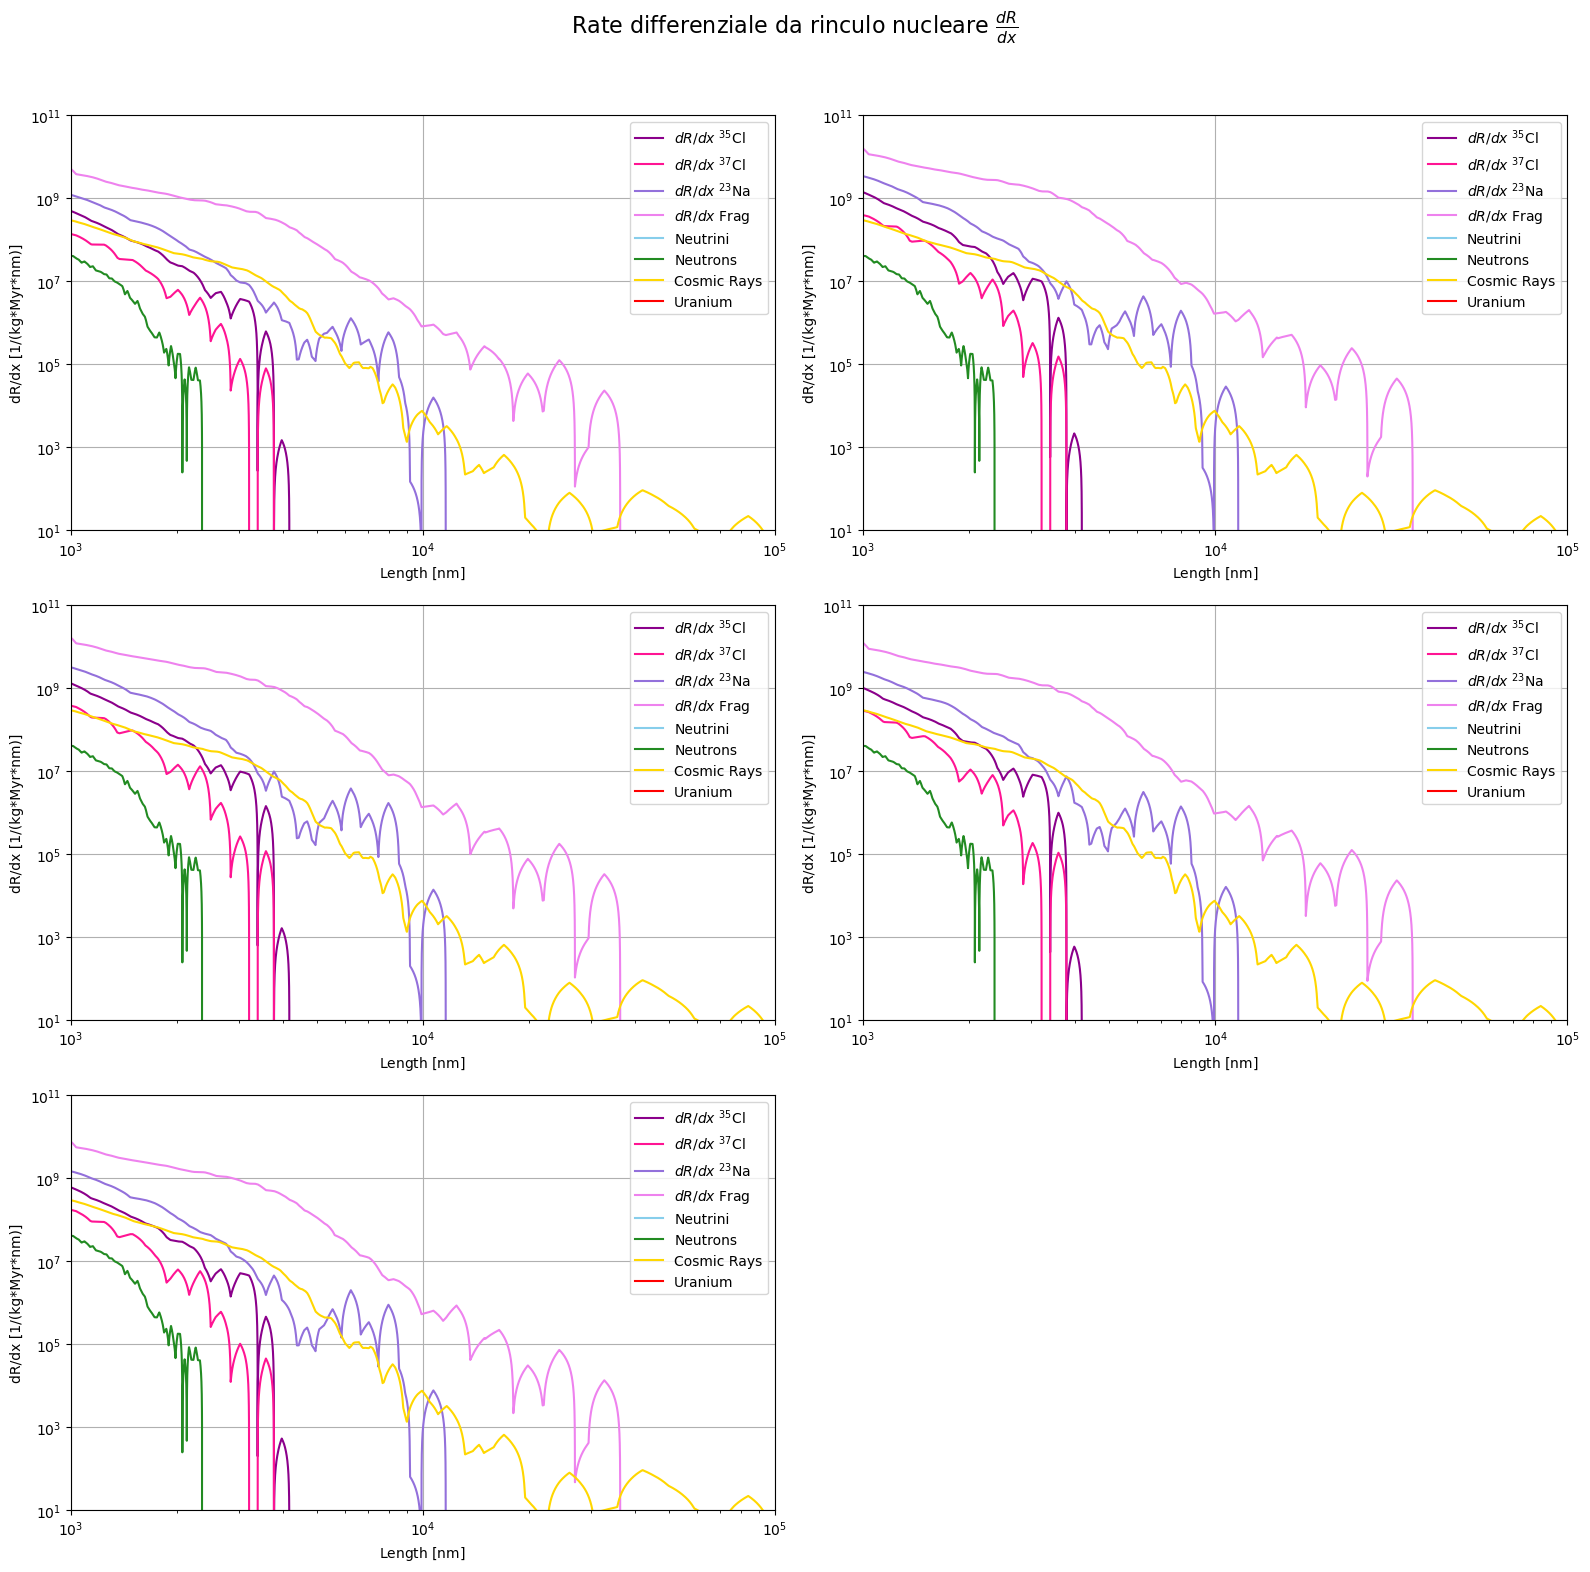

In [10]:
# Parametri iniziali
Er = np.logspace(-2, 3, 101)  # Energia in MeV
time_exposure = 13500 * 365 * 24 * 60 * 60  # Tempo di esposizione in secondi 
label_time_fluxes = ["100yr", "300yr", "1kyr", "3kyr", "10kyr"]  # Nome dei file .dat del tempo di durata dei flussi 
time_fluxes = [1.5e-4, 4.5e-4, 1.35e-3, 3.5e-3, 1.35e-2]  # Intervallo tra un flusso e l'altro in Myr


# Crea la figura e i subplot 2x2
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
fig.suptitle("Rate differenziale da rinculo nucleare $\\frac{{dR}}{{dx}}$", fontsize=16)

for idx, label in enumerate(label_time_fluxes):
    
    # Carica il flusso iniziale
    x, y = np.loadtxt(f"MuonFluxes/SN20pc{label}.txt", usecols=(0, 1), unpack=True)
    # Crea un array di flussi interpolati
    y = y[:-1] / np.diff(x)
    x = x[:-1]
    flux_func = log_interp1d(x, y)  # Energia in GeV e flusso m^-2*s^-1*sr^-1*GeV^-1

    # Integra e calcola conteggi
    Num = Integration([flux_func], [time_fluxes[idx]], time_exposure)
    Conta = Count(Num, Er)

    Er_width = np.diff(Er)
    Er_mid   = Er[:-1] + Er_width / 2

    # Somma i fragmenti di tutti i nuclei
    Frag = np.zeros(len(Er_mid))
    for k in range(len(Conta[4])):  # Conta[4] = "lunghezza di nuclei" (?) 
        for l in range(len(Er_mid)):
            Frag[l] += Conta[3][k][l]  # Somma i bin dei vari nuclei

    # Interpola i contributi (F35, F37, F23) e normalizza con factor/Er_width
    F35 = interp1d(Er_mid, Conta[0] / Er_width, fill_value='extrapolate')
    F37 = interp1d(Er_mid, Conta[1] / Er_width, fill_value='extrapolate')
    F23 = interp1d(Er_mid, Conta[2] / Er_width, fill_value='extrapolate')

    # Sceglie il subplot
    ax = axs[idx // 2, idx % 2]
    axs[2,1].set_visible(False) #nascondo il subplor che non mi serve

    # Aggiungo il calcolo di dR/dx (z_bins in nm)
    z_bins = np.linspace(0, 100000, 100000)
    #correzione numero di z_bins
    zz_centre = z_bins[:-1] +  np.diff(z_bins)/2.

    # dR/dE -> dR/dx con la funzione dRdx_modified(...)
    # Divido per (length*rho) se interpretato come conversione tra sezione e massa
    y_values35 = halite.dRdx_modified(z_bins, Er_mid*1e3, F35(Er_mid)*1e-3/(length*rho))
    y_values37 = halite.dRdx_modified(z_bins, Er_mid*1e3, F37(Er_mid)*1e-3/(length*rho))
    y_values23 = halite.dRdx_modified(z_bins, Er_mid*1e3, F23(Er_mid)*1e-3/(length*rho))
    # Somma di tutti i frammenti
    y_valuesFrag = halite.dRdx_modified(z_bins, Er_mid*1e3, Frag*1e-3/Er_width/(length*rho))
    
    # Altri contributi
    y_nu        = halite.dRdx_nu(z_bins)
    y_neutrons  = halite.dRdx_neutrons(z_bins)
    y_cosmicrays = halite.dRdx_muons_new(z_bins, "Resconi")
    
    #adding Uranium tracks
    data_U = np.loadtxt("../Fission/Uranium_counts.txt", comments="#")
    i_index = data_U[:,0]   # 0..(n_bins-2)
    count_U = data_U[:,1]   # lunghezza 199

    U_x_min = 1
    U_x_max = 5
    U_n_bins = 200
    U_length = np.logspace(U_x_min, U_x_max, U_n_bins) 
    length_centers = 0.5*(U_length[:-1] + U_length[1:])
    bin_widths = U_length[1:] - U_length[:-1]

    
    y_U = count_U / bin_widths
    f_U = interp1d(length_centers, y_U, bounds_error=False, fill_value=0.0)
    yU_interp = f_U(zz_centre)

    # Plot
    ax.loglog(zz_centre, y_values35, label='$dR/dx$ $^{35}$Cl', color='darkmagenta')
    ax.loglog(zz_centre, y_values37, label='$dR/dx$ $^{37}$Cl', color='deeppink')
    ax.loglog(zz_centre, y_values23, label='$dR/dx$ $^{23}$Na', color='mediumpurple')
    ax.loglog(zz_centre, y_valuesFrag, label='$dR/dx$ Frag', color='violet')

    # Valuta tu se serve la stessa scala:
    ax.loglog(zz_centre, y_nu, label='Neutrini', color='skyblue')
    ax.loglog(zz_centre, y_neutrons, label='Neutrons', color='forestgreen')
    ax.loglog(zz_centre, y_cosmicrays, label='Cosmic Rays',color='gold')
    ax.loglog(zz_centre, yU_interp, label='Uranium', color='red')


    ax.set_xlabel("Length [$\\mathrm{nm}$]")
    ax.set_ylabel("dR/dx [1/(kg*Myr*nm)]")
    ax.set_xlim(1e3, 1e5)
    ax.set_ylim(1e1, 1e11)
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Difference between tracks with and without the correction of Zircon

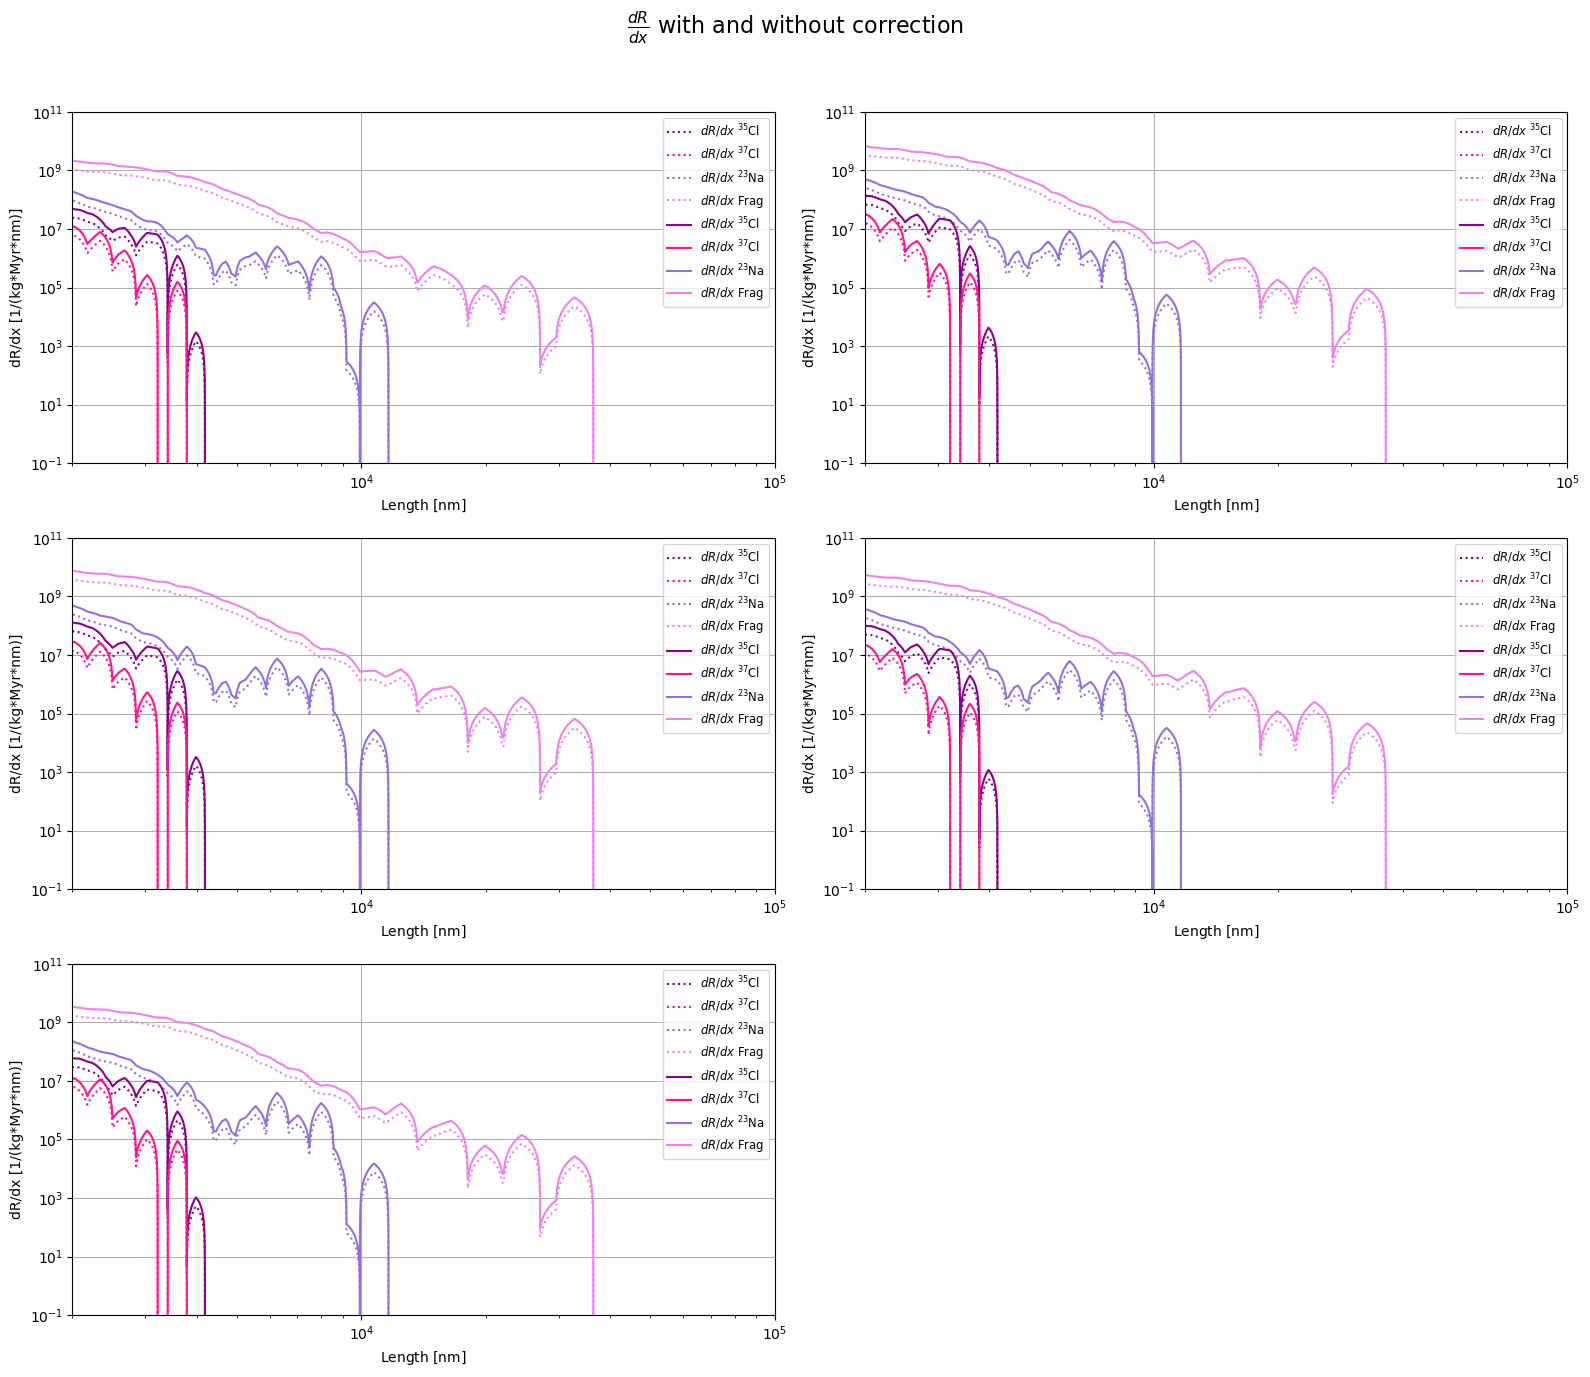

In [11]:
# Parametri iniziali
Er = np.logspace(-2, 3, 101)  # Energia in MeV
time_exposure = 13500 * 365 * 24 * 60 * 60  # Tempo di esposizione in secondi 
label_time_fluxes = ["100yr", "300yr", "1kyr", "3kyr", "10kyr"]  # Nome dei file .dat del tempo di durata dei flussi 
time_fluxes = [1.5e-4, 4.5e-4, 1.35e-3, 3.5e-3, 1.35e-2]  # Intervallo tra un flusso e l'altro in Myr
ratio=2


# Crea la figura e i subplot 3x2
fig, axs = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle("$\\frac{{dR}}{{dx}}$ with and without correction", fontsize=16)

for idx, label in enumerate(label_time_fluxes):
    
    # Carica il flusso iniziale
    x, y = np.loadtxt(f"MuonFluxes/SN20pc{label}.txt", usecols=(0, 1), unpack=True)
    # Crea un array di flussi interpolati
    y = y[:-1] / np.diff(x)
    x = x[:-1]
    flux_func = log_interp1d(x, y)  # Energia in GeV e flusso m^-2*s^-1*sr^-1*GeV^-1

    # Integra e calcola conteggi
    Num = Integration([flux_func], [time_fluxes[idx]], time_exposure)
    Conta = Count(Num, Er)

    Er_width = np.diff(Er)
    Er_mid   = Er[:-1] + Er_width / 2

    # Somma i fragmenti di tutti i nuclei
    Frag = np.zeros(len(Er_mid))
    for k in range(len(Conta[4])):  # Conta[4] = "lunghezza di nuclei" (?) 
        for l in range(len(Er_mid)):
            Frag[l] += Conta[3][k][l]  # Somma i bin dei vari nuclei

    # Interpola i contributi (F35, F37, F23) e normalizza con factor/Er_width
    F35 = interp1d(Er_mid, Conta[0] / Er_width, fill_value='extrapolate')
    F37 = interp1d(Er_mid, Conta[1] / Er_width, fill_value='extrapolate')
    F23 = interp1d(Er_mid, Conta[2] / Er_width, fill_value='extrapolate')

    # Sceglie il subplot
    ax = axs[idx // 2, idx % 2]
    axs[2,1].set_visible(False) #nascondo il subplor che non mi serve

    # Aggiungo il calcolo di dR/dx (z_bins in nm)
    z_bins = np.linspace(0, 100000, 100000)
    #correzione z_bins
    zz_centre = z_bins[:-1] +  np.diff(z_bins)/2.


    # Divido per (length*rho) se interpretato come conversione tra sezione e massa
    y_values35 = halite.dRdx_modified(z_bins, Er_mid*1e3, F35(Er_mid)*1e-3/(length*rho))
    y_values37 = halite.dRdx_modified(z_bins, Er_mid*1e3, F37(Er_mid)*1e-3/(length*rho))
    y_values23 = halite.dRdx_modified(z_bins, Er_mid*1e3, F23(Er_mid)*1e-3/(length*rho))
    # Somma di tutti i frammenti
    y_valuesFrag = halite.dRdx_modified(z_bins, Er_mid*1e3, Frag*1e-3/Er_width/(length*rho))
    

    # Plot without corrections
    ax.loglog(zz_centre, y_values35, label='$dR/dx$ $^{35}$Cl', color='darkmagenta', linestyle=":")
    ax.loglog(zz_centre, y_values37, label='$dR/dx$ $^{37}$Cl', color='deeppink', linestyle=":")
    ax.loglog(zz_centre, y_values23, label='$dR/dx$ $^{23}$Na', color='mediumpurple', linestyle=":")
    ax.loglog(zz_centre, y_valuesFrag, label='$dR/dx$ Frag', color='violet', linestyle=":")

    # Plot with corrections
    ax.loglog(zz_centre, ratio*y_values35, label='$dR/dx$ $^{35}$Cl', color='darkmagenta')
    ax.loglog(zz_centre, ratio*y_values37, label='$dR/dx$ $^{37}$Cl', color='deeppink')
    ax.loglog(zz_centre, ratio*y_values23, label='$dR/dx$ $^{23}$Na', color='mediumpurple')
    ax.loglog(zz_centre, ratio*y_valuesFrag, label='$dR/dx$ Frag', color='violet')

    ax.set_xlabel("Length [$\\mathrm{nm}$]")
    ax.set_ylabel("dR/dx [1/(kg*Myr*nm)]")
    ax.set_xlim(2e3, 1e5)
    ax.set_ylim(0.1, 1e11)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Number of tracks per track length

In [12]:
def integrate_in_bins(x, y, x_bins):
    """
    x: array 1D con i punti su cui è definita la curva (es. zz_centre).
    y: array 1D corrispondente, con dR/dx(x).
    x_bins: bordi dei bin, ad es. np.logspace(3,5,20).

    Restituisce un array con len(x_bins)-1 valori, 
    ognuno corrispondente all'integrale di y in [x_i, x_{i+1}].
    """
    counts = np.zeros(len(x_bins) - 1)
    for i in range(len(counts)):
        # maschera per i punti x dentro il bin
        mask = (x >= x_bins[i]) & (x < x_bins[i+1])
        if np.any(mask):
            # Esempio di integrazione numerica con trapz
            counts[i] = np.trapz(y[mask], x[mask])
    return counts


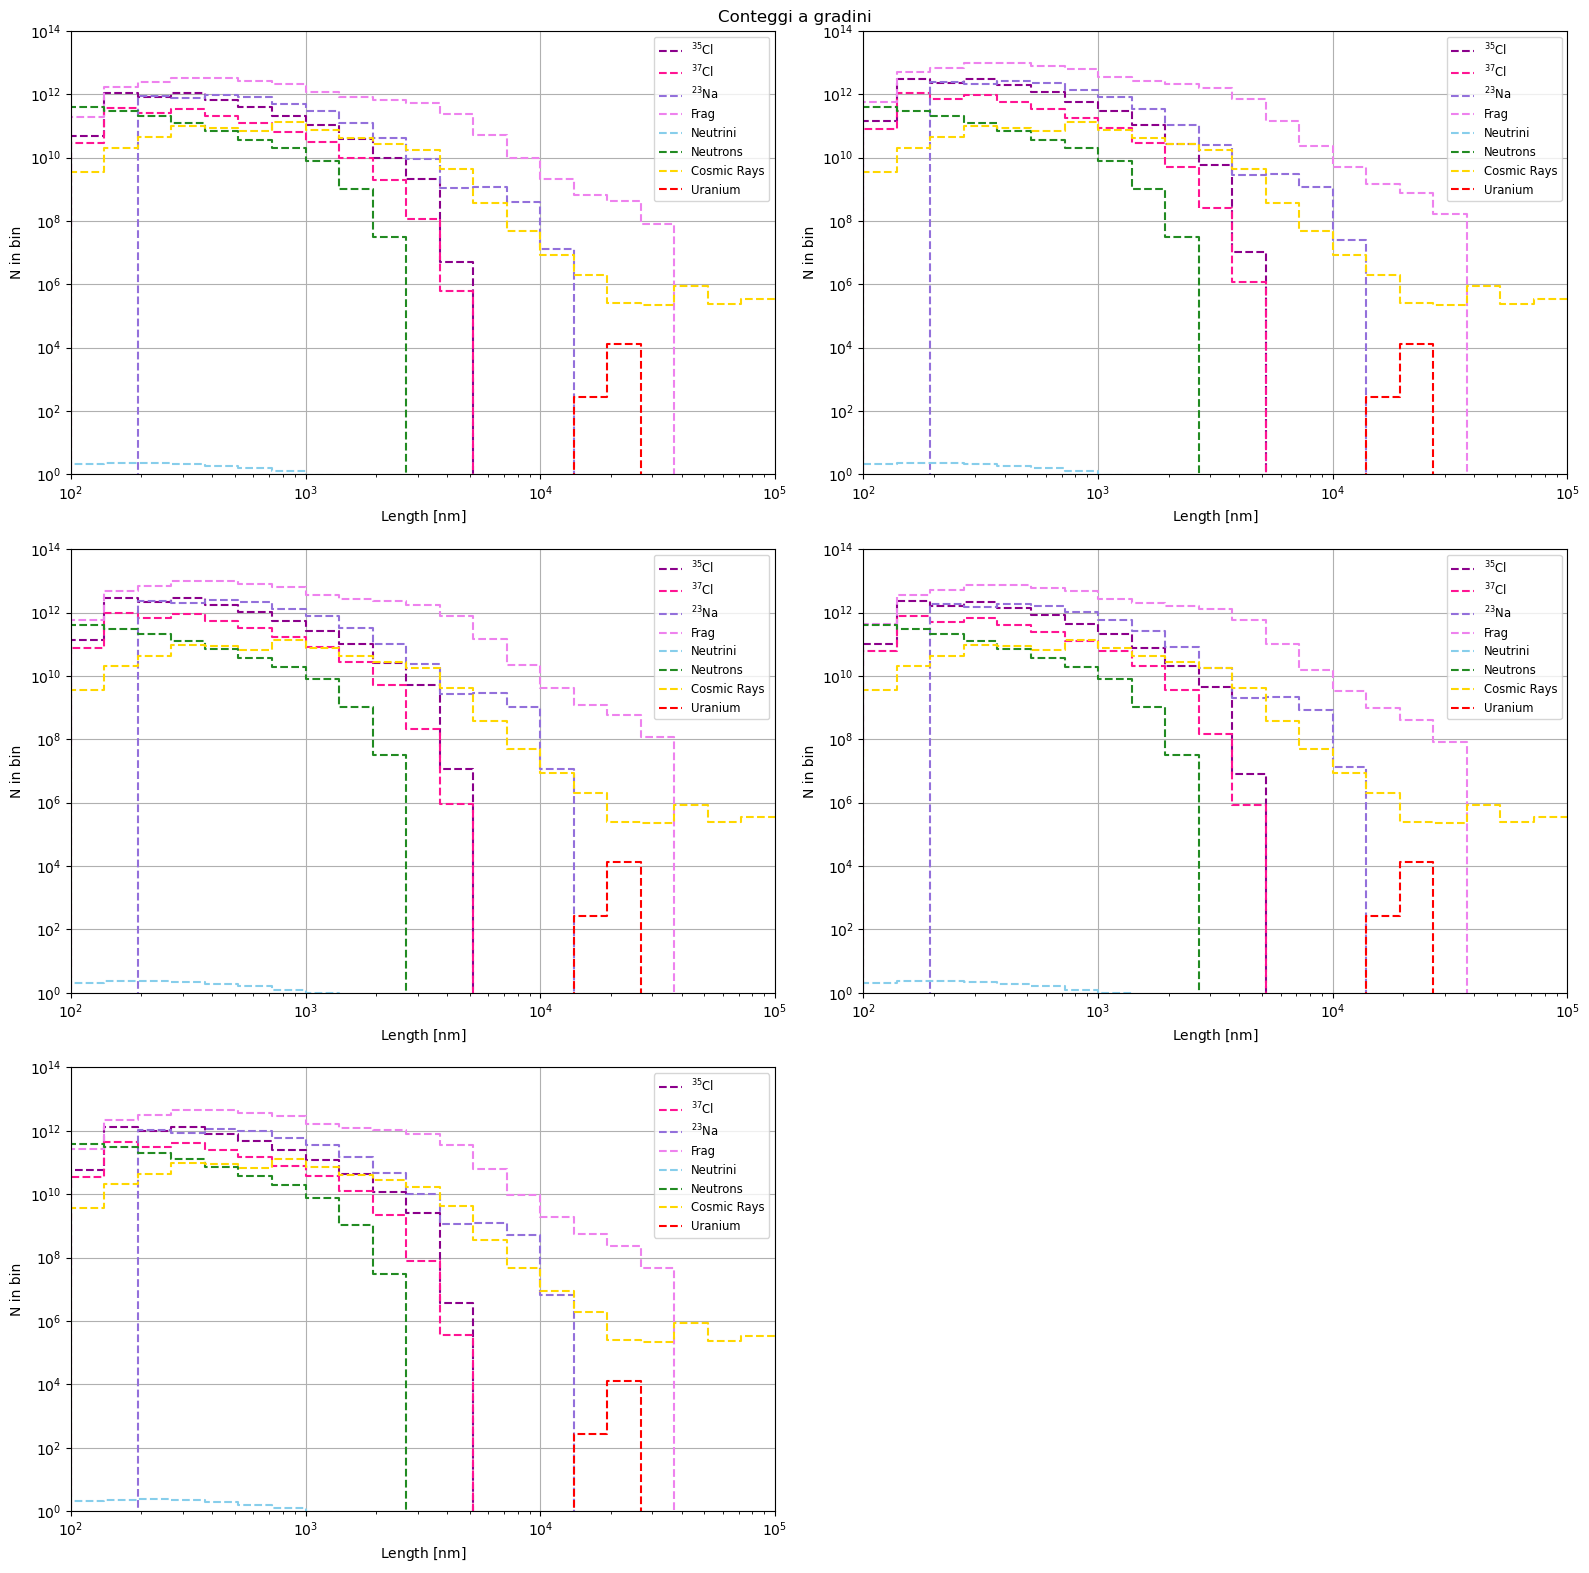

In [13]:
# Parametri iniziali
Er = np.logspace(-2, 3, 101)  # Energia in MeV
time_exposure = 13500 * 365 * 24 * 60 * 60  # Tempo di esposizione in secondi 
label_time_fluxes = ["100yr", "300yr", "1kyr", "3kyr", "10kyr"]  # Nome dei file .dat del tempo di durata dei flussi 
time_fluxes = [1.5e-4, 4.5e-4, 1.35e-3, 3.5e-3, 1.35e-2]  # Intervallo tra un flusso e l'altro in Myr


fig, axs = plt.subplots(3, 2, figsize=(16, 16))
fig.suptitle("Conteggi a gradini")

for idx, label in enumerate(label_time_fluxes):
    # Carica il flusso iniziale e crea interpolatore
    x, y = np.loadtxt(f"MuonFluxes/SN20pc{label}.txt", usecols=(0, 1), unpack=True)
    y = y[:-1] / np.diff(x)
    x = x[:-1]
    flux_func = log_interp1d(x, y)

    # Integra e conteggi
    Num = Integration([flux_func], [time_fluxes[idx]], time_exposure)
    Conta = Count(Num, Er)

    Er_width = np.diff(Er)
    Er_mid   = Er[:-1] + Er_width/2

    # Somma i fragmenti vari
    Frag = np.zeros(len(Er_mid))
    for k in range(len(Conta[4])):  # Conta[4] = "lunghezza di nuclei" (?)
        for l in range(len(Er_mid)):
            Frag[l] += Conta[3][k][l]

    # Interpola i contributi
    F35 = interp1d(Er_mid, Conta[0] / Er_width, fill_value='extrapolate')
    F37 = interp1d(Er_mid, Conta[1] / Er_width, fill_value='extrapolate')
    F23 = interp1d(Er_mid, Conta[2] / Er_width, fill_value='extrapolate')

    # Subplot
    ax = axs[idx // 2, idx % 2]
    axs[2,1].set_visible(False) #nascondo il subplor che non mi serve

    # Definiamo i bin su x (lunghezza) e calcoliamo dR/dx
    z_bins = np.linspace(0, 100000, 100000)
    zz_centre = z_bins[:-1] + np.diff(z_bins)/2.

    y_values35 = halite.dRdx_modified(z_bins, Er_mid*1e3, F35(Er_mid)*1e-3/(length*rho))
    y_values37 = halite.dRdx_modified(z_bins, Er_mid*1e3, F37(Er_mid)*1e-3/(length*rho))
    y_values23 = halite.dRdx_modified(z_bins, Er_mid*1e3, F23(Er_mid)*1e-3/(length*rho))

    y_valuesFrag = halite.dRdx_modified(z_bins, Er_mid*1e3, Frag*1e-3/Er_width/(length*rho))
    # Scelta dei bin di lunghezza (in nm), da 1e-2 a 1e5 su scala log:
    i_bins = np.logspace(-2, 5, 50)  # 20 bin => 21 edges

    # Integra y_values nei bin:
    counts_35 = integrate_in_bins(zz_centre, y_values35, i_bins)
    counts_37 = integrate_in_bins(zz_centre, y_values37, i_bins)
    counts_23 = integrate_in_bins(zz_centre, y_values23, i_bins)
    counts_Frag = integrate_in_bins(zz_centre, y_valuesFrag, i_bins)
    counts_nu = integrate_in_bins(zz_centre, y_nu, i_bins)
    counts_neutrons = integrate_in_bins(zz_centre, y_neutrons, i_bins)
    counts_cosmics = integrate_in_bins(zz_centre, y_cosmicrays, i_bins)
    counts_U = integrate_in_bins(zz_centre, yU_interp, i_bins)

    #signal plot
    ax.step(i_bins, np.r_[counts_35, counts_35[-1]], where='post', color='darkmagenta', linestyle='--', label='$^{35}$Cl')
    ax.step(i_bins, np.r_[counts_37, counts_37[-1]], where='post', color='deeppink',   linestyle='--', label='$^{37}$Cl')
    ax.step(i_bins, np.r_[counts_23, counts_23[-1]], where='post', color='mediumpurple', linestyle='--', label='$^{23}$Na')
    ax.step(i_bins, np.r_[counts_Frag, counts_Frag[-1]], where='post', color='violet', linestyle='--', label='Frag')

    #background plot
    ax.step(i_bins, np.r_[counts_nu, counts_nu[-1]], where='post', color='skyblue', linestyle='--', label='Neutrini') #non moltiplico questi background per factor perchè lo sono già le loro y
    ax.step(i_bins, np.r_[counts_neutrons, counts_neutrons[-1]], where='post', color='forestgreen', linestyle='--', label='Neutrons')
    ax.step(i_bins, np.r_[counts_cosmics, counts_cosmics[-1]], where='post', color='gold', linestyle='--', label='Cosmic Rays')
    ax.step(i_bins, np.r_[counts_U, counts_U[-1]], where='post', color='red', linestyle='--', label='Uranium')

    ax.set_xlabel("Length [$\\mathrm{nm}$]")
    ax.set_ylabel("N in bin")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e2, 1e5)
    ax.set_ylim(1, 1e14)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)

plt.tight_layout()
plt.show()